In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file issuesClose.csv
issues_close_df = pd.read_csv('issuesClose.csv')

# Đọc dữ liệu từ file issuesOpen.csv
issues_open_df = pd.read_csv('issuesOpen.csv')


In [8]:
# Tính tổng số issues đã giải quyết
total_close_issues = len(issues_close_df)

# Tính tổng số issues chưa giải quyết
total_open_issues = len(issues_open_df)
print(total_close_issues)
print(total_open_issues)

5500
2604


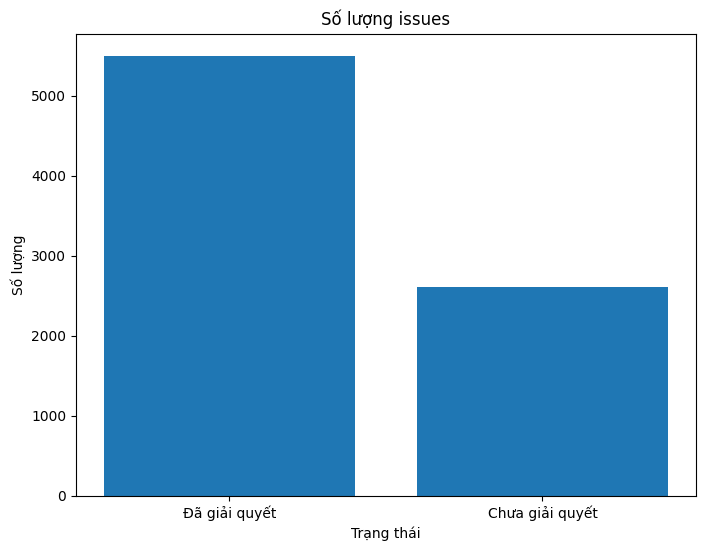

In [10]:

# Tạo biểu đồ 2 cột
x = ['Đã giải quyết', 'Chưa giải quyết']
y = [total_close_issues, total_open_issues]

plt.figure(figsize=(8, 6))
plt.bar(x, y)
plt.title('Số lượng issues')
plt.xlabel('Trạng thái')
plt.ylabel('Số lượng')
plt.show()


In [14]:
# Tính toán thời gian để giải quyết mỗi issues
issues_close_df['Solve Time'] = pd.to_datetime(issues_close_df['Solve Date']) - pd.to_datetime(issues_close_df['Date Appear'])

In [15]:
# Huấn luyện mô hình Regression để dự đoán tỷ lệ
X = issues_close_df['Solve Time'].dt.days.values.reshape(-1, 1)
y = [total_open_issues / (total_close_issues + i) for i in range(len(X))]
model = LinearRegression()
model.fit(X, y)

# Dự đoán tỷ lệ trong tương lai
future_time_points = [30, 90, 180, 365]  # 1 tháng, 3 tháng, 6 tháng, 1 năm
future_ratios = [model.predict([[t]])[0] for t in future_time_points]

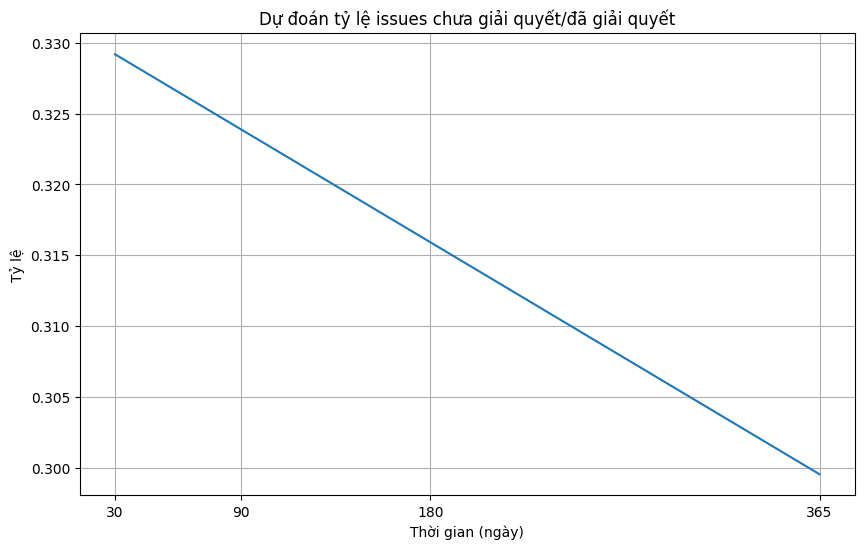

In [16]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(future_time_points, future_ratios)
plt.title('Dự đoán tỷ lệ issues chưa giải quyết/đã giải quyết')
plt.xlabel('Thời gian (ngày)')
plt.ylabel('Tỷ lệ')
plt.xticks(future_time_points)
plt.grid()
plt.show()
